# Problem - Prediction of wine quality

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data_red = pd.read_csv('red_wine_dataset.csv')

In [13]:
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
data_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
data_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [47]:
X = data_red.drop('quality', axis = 1)
y =( data_red['quality'] > 5).astype('int')

## Correlation check 

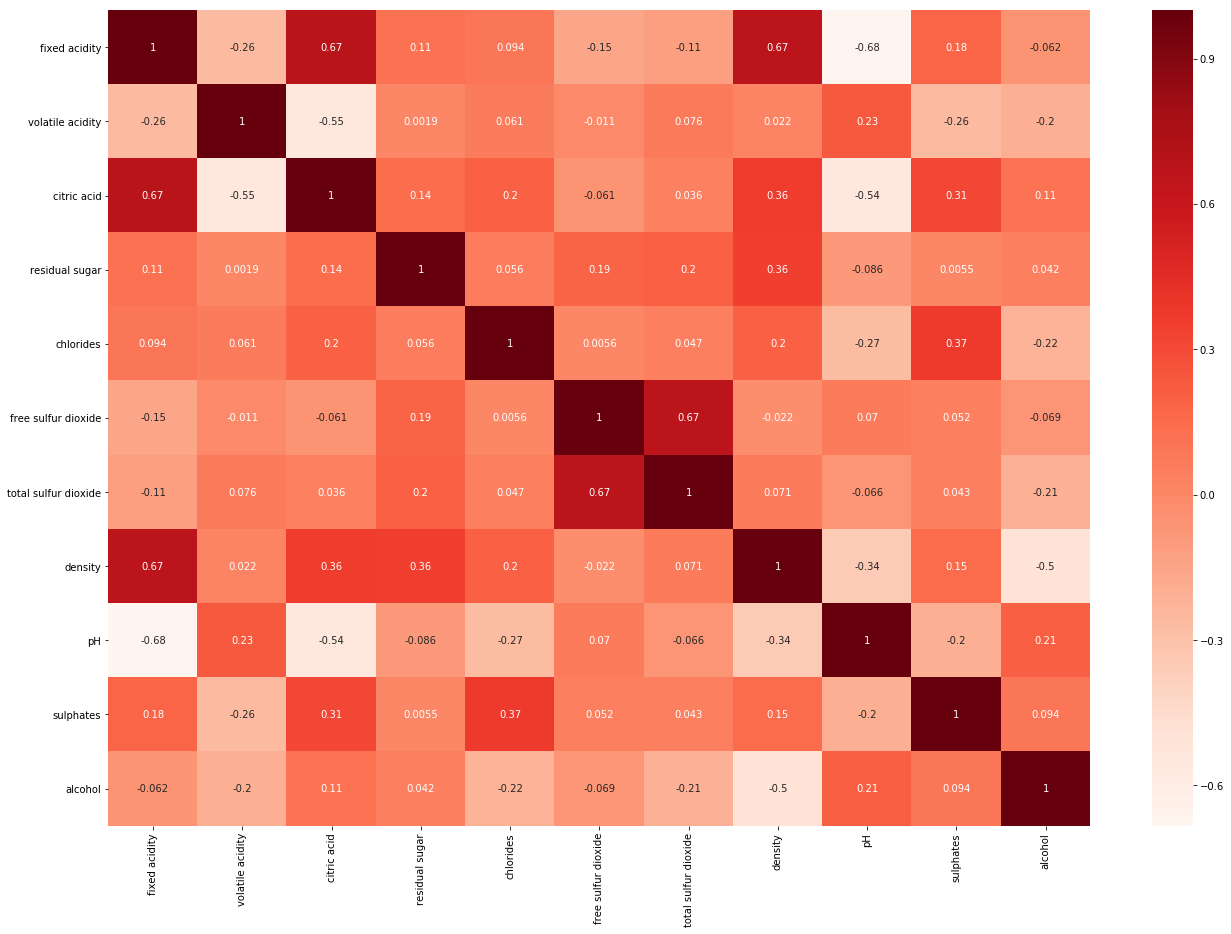

In [36]:
plt.subplots(figsize=(22,15))
x_corr = X.corr()
sns.heatmap(x_corr, xticklabels= 'auto', yticklabels='auto', cmap = 'Reds', annot=True,)
plt.show()

##### 1. PH and fixed acidity is highly negatively correlated, i.e., when ph is increased, acidity is decreased
#### 2. Ph and citric acide is highly negatively correlated.
#### 3. total sulfure dioxide and  free sulfure oxide is highly positively correlated


In [52]:
from sklearn.model_selection import  train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, y, stratify = y, test_size = 0.20)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  confusion_matrix, precision_recall_fscore_support, classification_report, accuracy_score, log_loss
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV

In [83]:
# Without hyperparamters tunning
logreg = LogisticRegression()
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
logreg.fit(train_X, train_Y)
# Train accuracy
print('Train accuracy',accuracy_score(train_Y, logreg.predict(train_X)))
# Test accuracy
print('Test accuracy',accuracy_score(test_Y, logreg.predict(test_X)))

Train accuracy 0.752931978108
Test accuracy 0.71875


In [82]:
# cross validation 
kfold = 10
result = cross_val_score(estimator = logreg, X = train_X, y = train_Y, scoring='accuracy',cv= kfold)
print('Accuracy in each run {}'.format(result))
print('Average accuracy {}'.format(result.mean()))

Accuracy in each run [ 0.69767442  0.72868217  0.72093023  0.74418605  0.75        0.78740157
  0.76377953  0.78740157  0.75590551  0.73228346]
Average accuracy 0.7468244521760361


##### As avergae accuracy by cross validation is close to Testing accuracy, model is not overfitted

## Loss, Confusion matrix, precision and recall

In [70]:
# Loss on testing data
print('Loss',log_loss(test_Y, logreg.predict(test_X)))

Loss 9.71416329439


In [71]:
# Train data
confusion_matrix(train_Y,logreg.predict(train_X))

array([[440, 155],
       [161, 523]], dtype=int64)

In [76]:
# Test data
print(confusion_matrix(test_Y, logreg.predict(test_X)))

[[ 96  53]
 [ 37 134]]


In [75]:
print(classification_report(test_Y, logreg.predict(test_X)))

             precision    recall  f1-score   support

          0       0.72      0.64      0.68       149
          1       0.72      0.78      0.75       171

avg / total       0.72      0.72      0.72       320



# Hyperparameters tunning using GridSearchCV()

In [91]:
# select few paramters while keeping others as default
parameters = {'C':[0.5,0.6,0.8,1],
             'penalty':['l1','l2'],
             'max_iter':[100,200,300]}
grid_search = GridSearchCV(estimator=logreg, param_grid=parameters) 
grid_search.fit(train_X, train_Y)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.5, 0.6, 0.8, 1], 'penalty': ['l1', 'l2'], 'max_iter': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [92]:
# Best estimator parameters
grid_search.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

## Fitting LogisticRegression with Best params

In [94]:
log_reg = LogisticRegression(C=1, max_iter=100, penalty='l2')
log_reg.fit(train_X, train_Y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Loss, Confusion matrix, precision and recall After Hyperparameters fitting

In [95]:
# Loss on testing data
print('Loss',log_loss(test_Y, log_reg.predict(test_X)))

Loss 9.71416329439


In [96]:
# Test data
confusion_matrix(test_Y,log_reg.predict(test_X))

array([[ 96,  53],
       [ 37, 134]], dtype=int64)

In [98]:
# Test data
print(confusion_matrix(test_Y, log_reg.predict(test_X)))

[[ 96  53]
 [ 37 134]]


In [97]:
print(classification_report(test_Y, log_reg.predict(test_X)))

             precision    recall  f1-score   support

          0       0.72      0.64      0.68       149
          1       0.72      0.78      0.75       171

avg / total       0.72      0.72      0.72       320

